# Data Acquisition

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats 
from scipy.stats import pearsonr
import requests
import os
pd.set_option('display.max_columns',None)
pd.set_option('display.max_columns',50)


def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)

In [191]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"
filename = "laptops.csv"
download(url, filename)

## Read File

In [194]:
df = pd.read_csv(filename, header=None)
print(df.head())

     0   1          2   3   4   5       6    7   8    9     10    11
0  Acer   4  IPS Panel   2   1   5   35.56  1.6   8  256   1.6   978
1  Dell   3    Full HD   1   1   3  39.624  2.0   4  256   2.2   634
2  Dell   3    Full HD   1   1   7  39.624  2.7   8  256   2.2   946
3  Dell   4  IPS Panel   2   1   5  33.782  1.6   8  128  1.22  1244
4    HP   4    Full HD   2   1   7  39.624  1.8   8  256  1.91   837


In [196]:
headers = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_CM", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg","Price"]

In [198]:
df.columns = headers

# Data Preprocessing before EDA

## Data Overview

In [202]:
df.head(20)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016
6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.1,1117
7,Acer,3,IPS Panel,2,1,5,38.1,1.6,4,256,2.2,866
8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.3,812
9,Acer,3,IPS Panel,3,1,7,38.1,1.8,8,256,2.2,1068


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Manufacturer    238 non-null    object 
 1   Category        238 non-null    int64  
 2   Screen          238 non-null    object 
 3   GPU             238 non-null    int64  
 4   OS              238 non-null    int64  
 5   CPU_core        238 non-null    int64  
 6   Screen_Size_CM  238 non-null    object 
 7   CPU_frequency   238 non-null    float64
 8   RAM_GB          238 non-null    int64  
 9   Storage_GB_SSD  238 non-null    int64  
 10  Weight_kg       238 non-null    object 
 11  Price           238 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 22.4+ KB


In [206]:
df.shape

(238, 12)

In [208]:
df.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_CM', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_kg', 'Price'],
      dtype='object')

In [210]:
df.nunique()

Manufacturer       11
Category            5
Screen              2
GPU                 3
OS                  2
CPU_core            3
Screen_Size_CM     10
CPU_frequency      11
RAM_GB              5
Storage_GB_SSD      2
Weight_kg          78
Price             193
dtype: int64

In [212]:
df["CPU_frequency"].value_counts()

CPU_frequency
2.5    71
2.7    43
1.6    30
2.8    25
1.8    23
2.6    11
2.3    11
2.4    10
2.0     9
2.9     4
1.2     1
Name: count, dtype: int64

In [214]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [216]:
df.isna().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [218]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_CM     object
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg          object
Price               int64
dtype: object

In [220]:
for column in df.columns:
    print(f'Unique values in {column}: {df[column].unique()}')

Unique values in Manufacturer: ['Acer' 'Dell' 'HP' 'Asus' 'Lenovo' 'Huawei' 'Toshiba' 'MSI' 'Razer'
 'Samsung' 'Xiaomi']
Unique values in Category: [4 3 1 5 2]
Unique values in Screen: ['IPS Panel' 'Full HD']
Unique values in GPU: [2 1 3]
Unique values in OS: [1 2]
Unique values in CPU_core: [5 3 7]
Unique values in Screen_Size_CM: ['35.56' '39.624' '33.782' '38.1' '33.02' '43.942' '43.18' '31.75' '30.48'
 '?']
Unique values in CPU_frequency: [1.6 2.  2.7 1.8 2.5 2.4 2.8 1.2 2.9 2.6 2.3]
Unique values in RAM_GB: [ 8  4  6 16 12]
Unique values in Storage_GB_SSD: [256 128]
Unique values in Weight_kg: ['1.6' '2.2' '1.22' '1.91' '2.1' '2.3' '2.13' '2' '1.7' '1.4' '1.86'
 '1.88' '1.63' '1.83' '1.96' '1.21' '2.65' '1.25' '1.38' '?' '1.3' '1.58'
 '2.5' '1.75' '1.48' '3' '1.05' '1.12' '1.2' '2.56' '3.6' '1.41' '2.05'
 '1.95' '3.42' '1.1' '1.26' '1.84' '2.6' '1.36' '2.33' '1.5' '2.7' '1.9'
 '1.43' '2.31' '1.64' '2.17' '1.65' '2.67' '1.42' '1.78' '1.49' '1.44'
 '1.29' '2.04' '1.32' '2.02' '1.93'

## Handling Missing Values

Here I found "?" to be unknown hence replacing it with np.NaN

In [224]:
df.replace("?", np.NaN, inplace = True)

Checking for Non- Numeric Values in Numeric columns

In [227]:
for column in df.select_dtypes(include=[np.number]).columns:
        non_numeric = df[pd.to_numeric(df[column], errors='coerce').isna()]
        if not non_numeric.empty:
            print(f'Non-numeric values in {column}:\n', non_numeric)

There are no non numeric values in any numeric columns

In [230]:
df.describe(include = "all")

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,234,238.000000,238.000000,238.000000,233,238.000000
unique,11,NaN,2,NaN,NaN,NaN,9,NaN,NaN,NaN,77,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,39.624,NaN,NaN,NaN,2.2,NaN
freq,71,NaN,161,NaN,NaN,NaN,89,NaN,NaN,NaN,21,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,NaN,2.360084,7.882353,245.781513,NaN,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,NaN,0.411393,2.482603,34.765316,NaN,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,NaN,1.200000,4.000000,128.000000,NaN,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.000000,8.000000,256.000000,NaN,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.500000,8.000000,256.000000,NaN,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,NaN,2.700000,8.000000,256.000000,NaN,1777.000000


## Data Formatting

Here Screen_Size_inch, Weight_kg should be of float type hence converting their data type

In [234]:
df["Screen_Size_CM"] = df["Screen_Size_CM"].astype("float64")

In [236]:
df["Weight_kg"] = df["Weight_kg"].astype("float64")

In [238]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_CM    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

Checking for Non- Numeric Values in Numeric columns

In [241]:
for column in df.select_dtypes(include=[np.number]).columns:
        non_numeric = df[pd.to_numeric(df[column], errors='coerce').isna()]
        if not non_numeric.empty:
            print(f'Non-numeric values in {column}:\n', non_numeric)

Non-numeric values in Screen_Size_CM:
     Manufacturer  Category   Screen  GPU  OS  CPU_core  Screen_Size_CM  \
120         Dell         4  Full HD    2   1         5             NaN   
151         Dell         5  Full HD    3   1         7             NaN   
187      Samsung         4  Full HD    2   1         7             NaN   
230         Dell         4  Full HD    2   1         5             NaN   

     CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
120            1.6       8             256       1.42   2340  
151            2.8       8             256       2.06   2240  
187            2.7       8             256       1.31   2031  
230            2.5       8             256       1.36   1870  
Non-numeric values in Weight_kg:
    Manufacturer  Category     Screen  GPU  OS  CPU_core  Screen_Size_CM  \
29           HP         3  IPS Panel    3   1         5          35.560   
38           HP         3  IPS Panel    2   1         5          33.020   
49         Dell 

Checking for NULL Values

In [244]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

## Data Cleaning

In [247]:
mode_Screen_Size_CM = df["Screen_Size_CM"].mode()
mode_Screen_Size_CM
# we see values in Screen_Size_inch are categorical in nature hence we replce NaN with most frequent value

0    39.624
Name: Screen_Size_CM, dtype: float64

In [249]:
df["Screen_Size_CM"].replace(np.NaN,mode_Screen_Size_CM[0], inplace = True)

In [251]:
mean_Weight_kg = df["Weight_kg"].mean()

In [253]:
df["Weight_kg"].replace(np.NaN,mean_Weight_kg, inplace = True)

In [255]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_CM    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

## Writing the New File to another CSV File

In [258]:
file_path = "/Users/vythreynarayanam/Downloads/Laptop_Pricing/eda_with_python_laptop_pricing/laptop_pricing.csv"

In [260]:
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"Deleted existing file: {file_path}")

Deleted existing file: /Users/vythreynarayanam/Downloads/Laptop_Pricing/eda_with_python_laptop_pricing/laptop_pricing.csv


In [262]:
df.to_csv(file_path, index = False)

In [264]:
laptop_pricing = pd.read_csv("/Users/vythreynarayanam/Downloads/Laptop_Pricing/eda_with_python_laptop_pricing/laptop_pricing.csv")

In [266]:
laptop_pricing.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [268]:
laptop_pricing.describe(include ="all")

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_CM,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
unique,11,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.205882,NaN,2.151261,1.058824,5.630252,37.309185,2.360084,7.882353,245.781513,1.862232,1462.344538
std,NaN,0.776533,NaN,0.638282,0.235790,1.241787,2.961753,0.411393,2.482603,34.765316,0.489090,574.607699
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.472500,1066.500000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.862232,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000


## Converting cm to inches, kg to pounds as required for this analysis(Data Formatting)

In [271]:
laptop_pricing["Weight_kg"] = laptop_pricing["Weight_kg"] * 2.205

In [273]:
laptop_pricing.rename(columns={"Weight_kg":"Weight_pounds"}, inplace = True)

In [275]:
laptop_pricing["Screen_Size_CM"] = laptop_pricing["Screen_Size_CM"] / 2.54

In [277]:
laptop_pricing.rename(columns={"Screen_Size_CM":"Screen_Size_inches"}, inplace = True)

In [279]:
laptop_pricing.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inches,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,3.52800,978
1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,4.85100,634
2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,4.85100,946
3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,2.69010,1244
4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,4.21155,837


In [281]:
laptop_pricing.nunique()

Manufacturer           11
Category                5
Screen                  2
GPU                     3
OS                      2
CPU_core                3
Screen_Size_inches      9
CPU_frequency          11
RAM_GB                  5
Storage_GB_SSD          2
Weight_pounds          78
Price                 193
dtype: int64

# Visualize individual feature patterns

## Binning

In [284]:
Price_Bins = np.linspace(laptop_pricing["Price"].min(),laptop_pricing["Price"].max(), 4)

In [286]:
Price_Labels = ["low","medium","high"]

In [288]:
laptop_pricing["Price_Binned"] = pd.cut(laptop_pricing["Price"],Price_Bins, labels = Price_Labels )

In [290]:
laptop_pricing["Price_Binned"] 

0         low
1         low
2         low
3         low
4         low
        ...  
233    medium
234    medium
235    medium
236       low
237       low
Name: Price_Binned, Length: 238, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

[Text(0, 0, '159'), Text(0, 0, '72'), Text(0, 0, '6')]

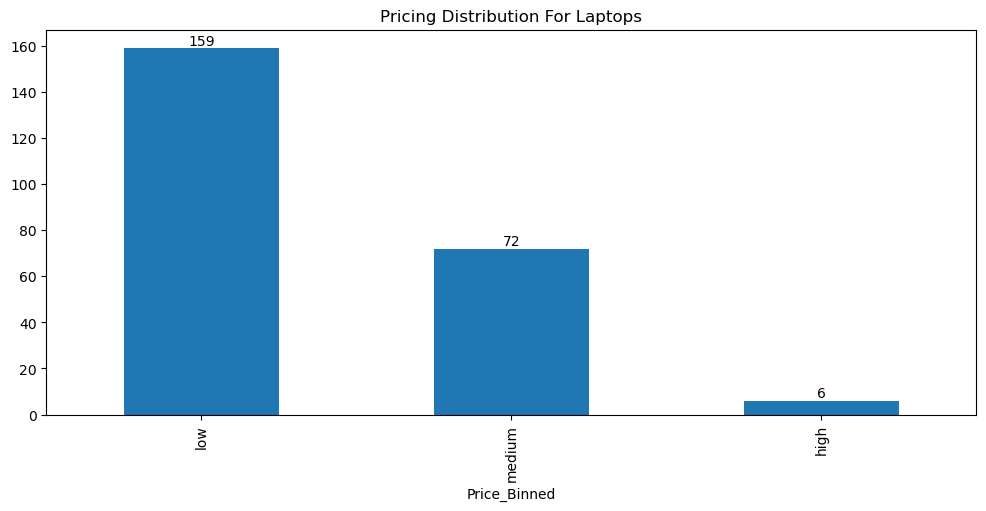

In [292]:
plt.figure(figsize=(12, 5))
graph_for_Price_Binned = laptop_pricing["Price_Binned"] .value_counts().plot(kind='bar',title ="Pricing Distribution For Laptops")
graph_for_Price_Binned.bar_label(graph_for_Price_Binned.containers[0], label_type='edge')

## Regression Plots

### CPU_frequency vs Price

<Axes: xlabel='Price', ylabel='CPU_frequency'>

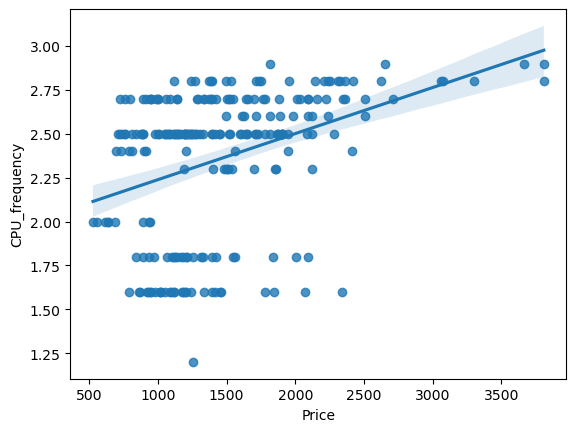

In [299]:
sns.regplot(x= "Price", y="CPU_frequency", data = laptop_pricing)

In [302]:
stats.pearsonr(laptop_pricing["CPU_frequency"],laptop_pricing["Price"])

PearsonRResult(statistic=0.36666555892588604, pvalue=5.5024633507134225e-09)

We can see there is not much correlation between cpu_frequency and price

### Screen_Size_inches vs Price

<Axes: xlabel='Price', ylabel='Screen_Size_inches'>

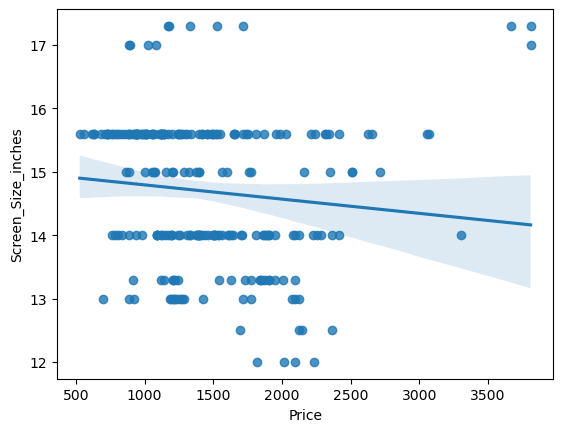

In [307]:
sns.regplot(x= "Price", y="Screen_Size_inches", data = laptop_pricing)

In [311]:
stats.pearsonr(laptop_pricing["Screen_Size_inches"],laptop_pricing["Price"])

PearsonRResult(statistic=-0.11064420817118284, pvalue=0.08853397846830666)

Screen_Size_inches and price have nearly very weak correlation with weak certainity

### Weight_pounds vs Price

<Axes: xlabel='Price', ylabel='Weight_pounds'>

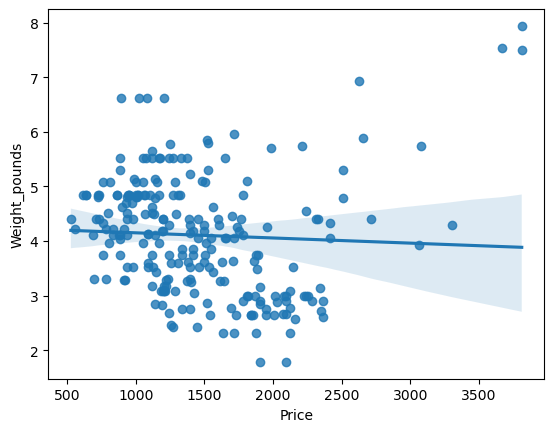

In [317]:
sns.regplot(x= "Price", y="Weight_pounds", data = laptop_pricing)

In [319]:
stats.pearsonr(laptop_pricing["Weight_pounds"],laptop_pricing["Price"])

PearsonRResult(statistic=-0.05031225837751547, pvalue=0.43976938534338944)

Weight_pounds and price cant be stated based on correlation between each other as seen from above results

## Box Plots for Categorical Variables

### Manufacturer vs Price

<Axes: xlabel='Manufacturer', ylabel='Price'>

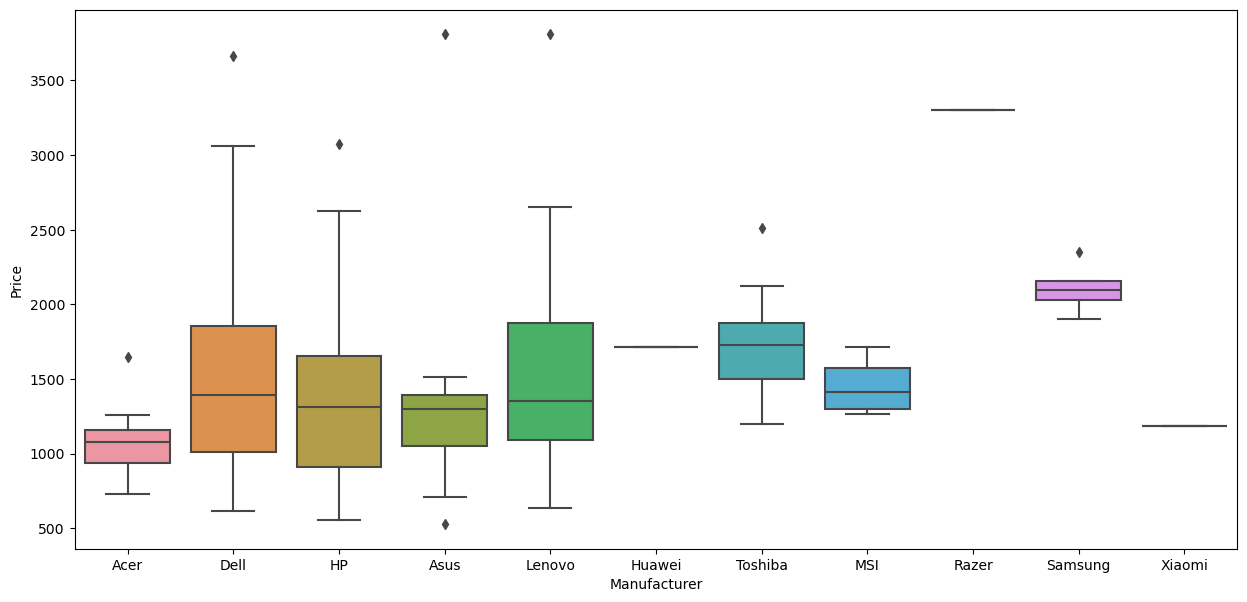

In [346]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "Manufacturer", y ="Price")

### Category vs Price

<Axes: xlabel='Category', ylabel='Price'>

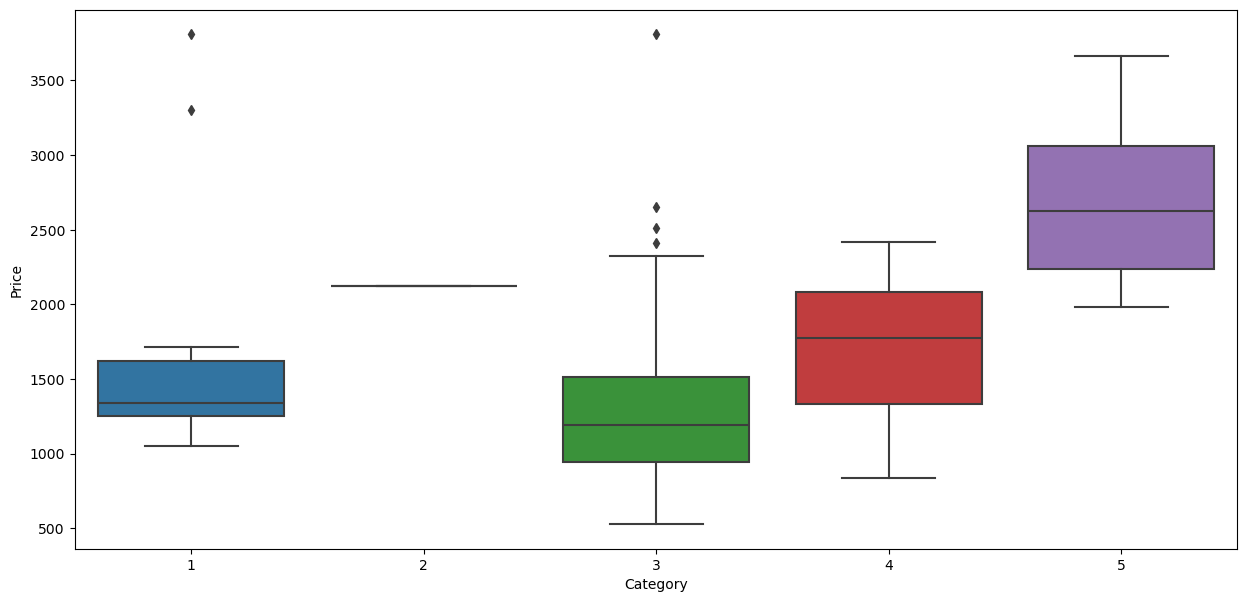

In [352]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "Category", y ="Price")

### Screen vs Price

<Axes: xlabel='Screen', ylabel='Price'>

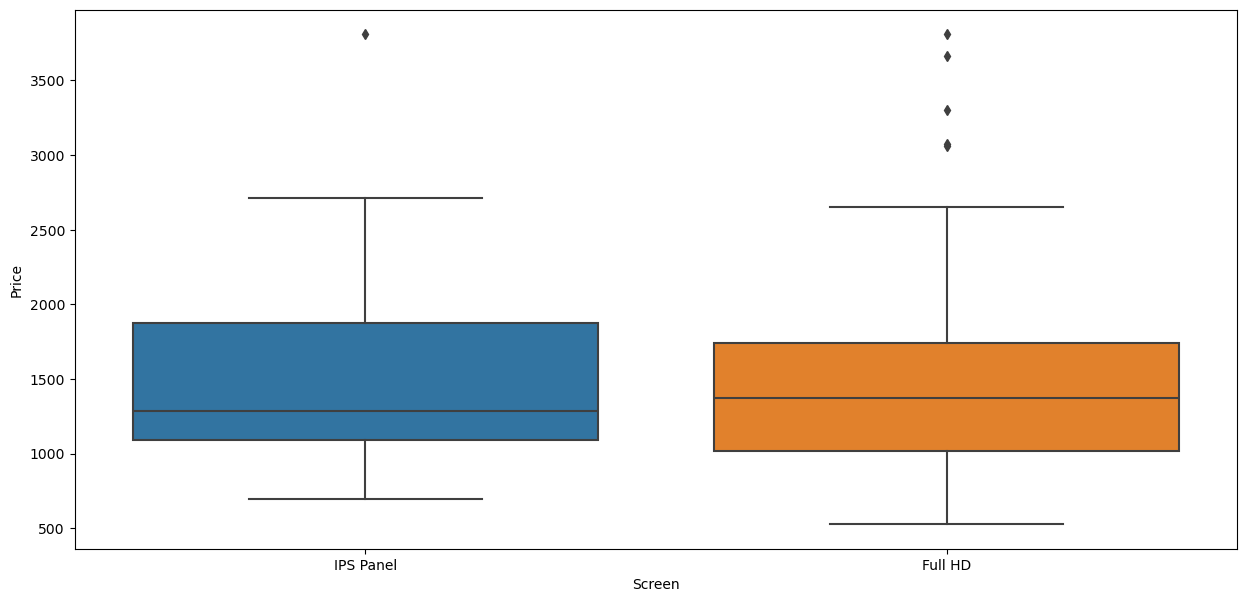

In [354]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "Screen", y ="Price")

### GPU vs Price

<Axes: xlabel='GPU', ylabel='Price'>

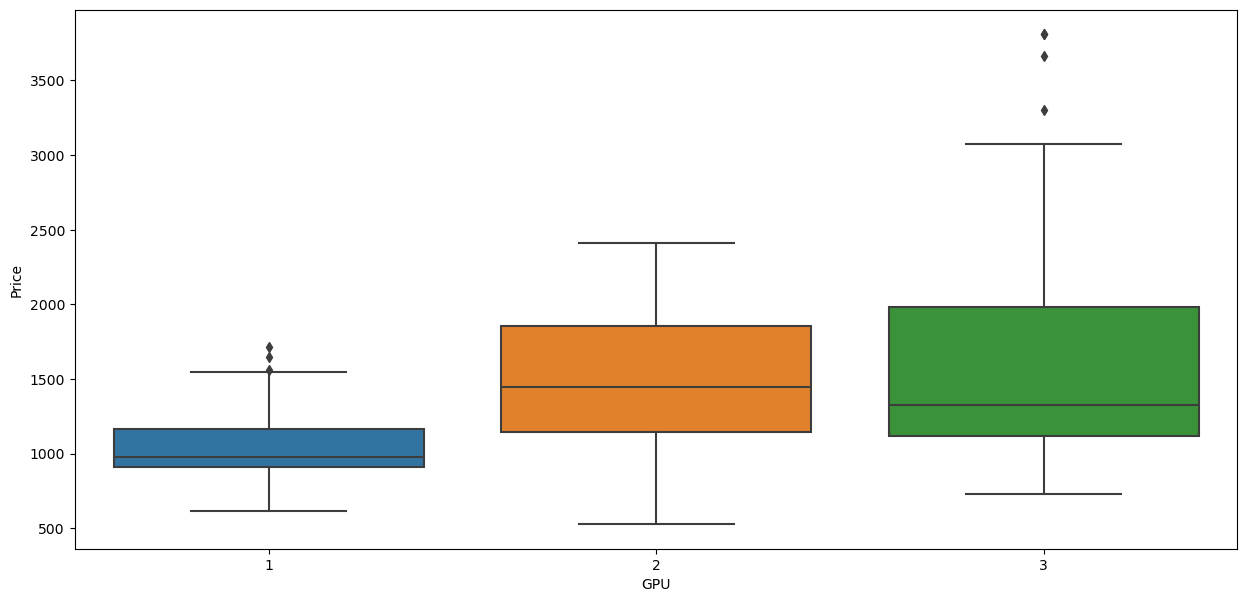

In [358]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "GPU", y ="Price")

### OS vs Price

<Axes: xlabel='OS', ylabel='Price'>

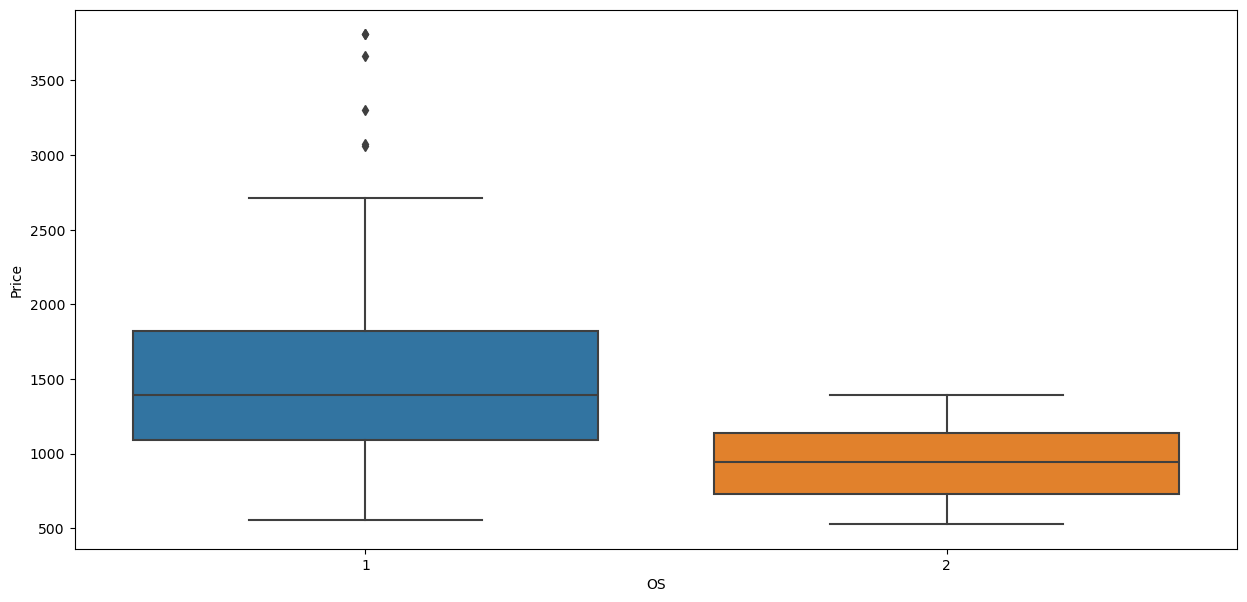

In [361]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "OS", y ="Price")

### CPU_core vs Price

<Axes: xlabel='CPU_core', ylabel='Price'>

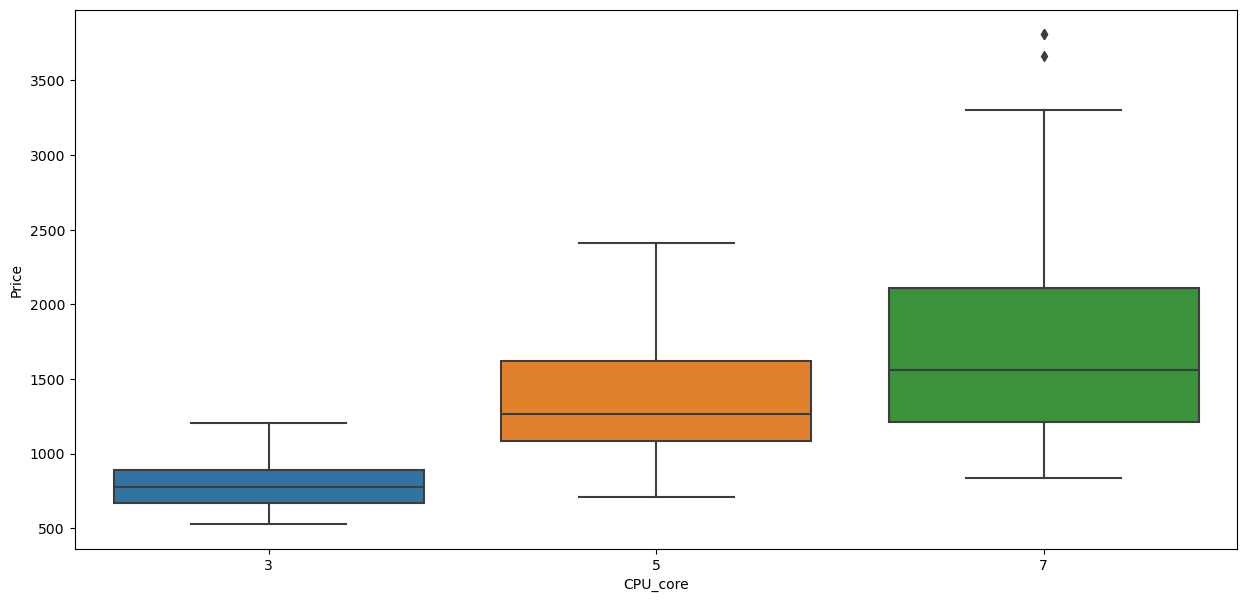

In [364]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "CPU_core", y ="Price")

### RAM_GB vs Price

<Axes: xlabel='RAM_GB', ylabel='Price'>

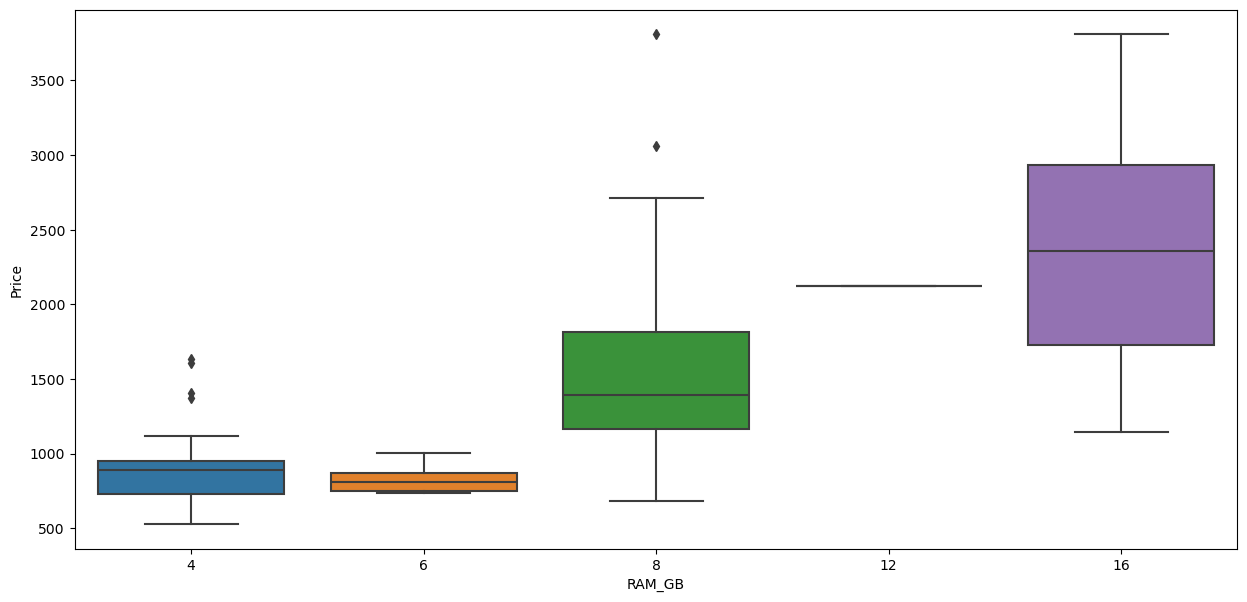

In [367]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "RAM_GB", y ="Price")

### Storage_GB_SSD vs Price

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

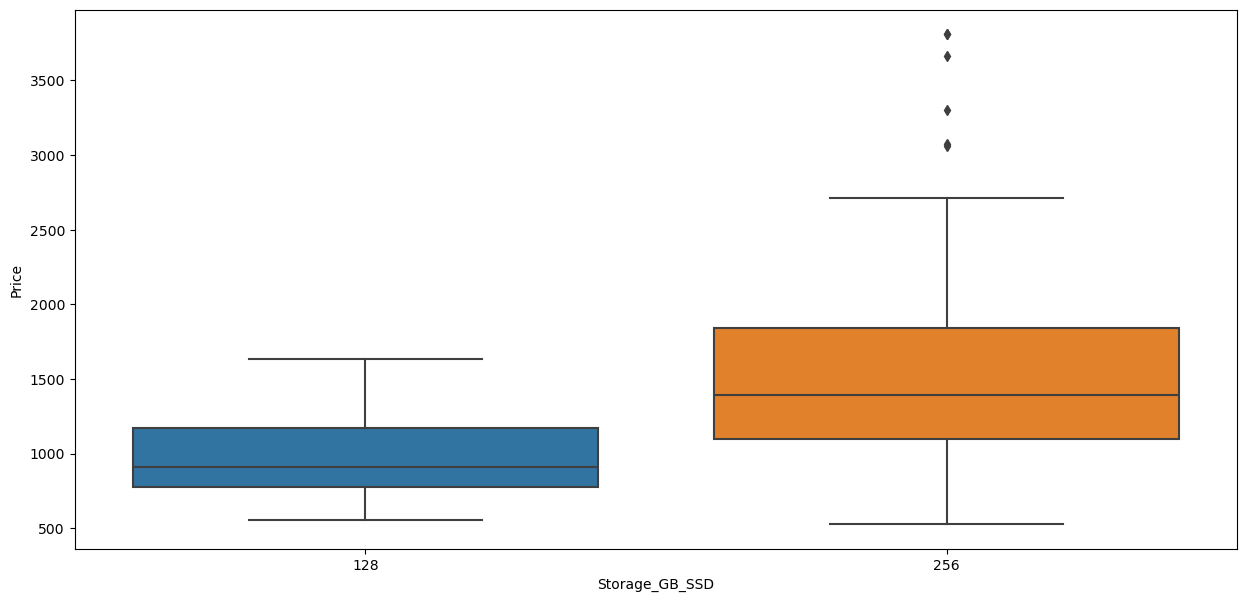

In [370]:
plt.figure(figsize= (15,7))
sns.boxplot(data = laptop_pricing, x = "Storage_GB_SSD", y ="Price")

## Group By and Pivot Table

### "GPU", "CPU_core", "Price"

In [397]:
laptop_pricing_group1 = laptop_pricing[["GPU", "CPU_core", "Price" ]]
laptop_pricing_group1_grouped = laptop_pricing_group1.groupby(["GPU", "CPU_core"],as_index = False).mean()

In [399]:
laptop_pricing_group1_pivot = laptop_pricing_group1_grouped.pivot(index = "CPU_core", columns = "GPU")

In [401]:
laptop_pricing_group1_pivot

Price                          
GPU                 1            2            3
CPU_core                                       
3          769.250000   785.076923   784.000000
5          998.500000  1462.197674  1220.680000
7         1167.941176  1744.621622  1945.097561

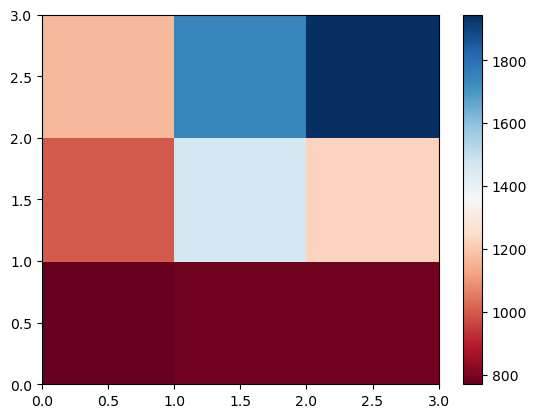

In [405]:
plt.pcolor(laptop_pricing_group1_pivot,cmap = "RdBu")
plt.colorbar()

We can see that GPU 3, with CPU_core 7 has highest price

## module 4

## One Hot Encoding

In [111]:
laptop_pricing.dtypes

Manufacturer            object
Category                 int64
Screen                  object
GPU                      int64
OS                       int64
CPU_core                 int64
Screen_Size_inches     float64
CPU_frequency          float64
RAM_GB                   int64
Storage_GB_SSD           int64
Weight_pounds          float64
Price                    int64
Price_Binned          category
dtype: object

checking the non numeric or categorical variables

In [413]:
laptop_pricing.select_dtypes(exclude=['float64','int64'])

,Manufacturer,Screen,Price_Binned
0,Acer,IPS Panel,low
1,Dell,Full HD,low
2,Dell,Full HD,low
3,Dell,IPS Panel,low
4,HP,Full HD,low
...,...,...,...
233,Lenovo,IPS Panel,medium
234,Toshiba,Full HD,medium
235,Lenovo,IPS Panel,medium
236,Lenovo,Full HD,low


In [415]:
laptop_pricing.columns

Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_inches', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_pounds', 'Price', 'Price_Binned'],
      dtype='object')

In [173]:
Columns_needed_to_create_dummies = laptop_pricing.select_dtypes(exclude=['float64','int64']).columns 

In [175]:
Columns_needed_to_create_dummies

Index(['Manufacturer', 'Screen', 'Price_Binned', 'Manufacturer_Acer',
       'Manufacturer_Asus', 'Manufacturer_Dell', 'Manufacturer_HP',
       'Manufacturer_Huawei', 'Manufacturer_Lenovo', 'Manufacturer_MSI',
       'Manufacturer_Razer', 'Manufacturer_Samsung', 'Manufacturer_Toshiba',
       'Manufacturer_Xiaomi', 'Screen_Full HD', 'Screen_IPS Panel',
       'Price_Binned_low', 'Price_Binned_medium', 'Price_Binned_high'],
      dtype='object')

In [421]:
for var in Columns_needed_to_create_dummies:
    cat_list = pd.get_dummies(laptop_pricing[var], prefix=var)
    existing_dummy_columns = [col for col in laptop_pricing.columns if col.startswith(var + '_')]
    if existing_dummy_columns:
        laptop_pricing = laptop_pricing.drop(columns=existing_dummy_columns)
    laptop_pricing_with_dummies = laptop_pricing.join(cat_list)
    laptop_pricing = laptop_pricing_with_dummies
cat_vars = Columns_needed_to_create_dummies
data_vars=laptop_pricing.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars or i in Columns_needed_to_create_dummies]
laptop_pricing_final=laptop_pricing[to_keep]
laptop_pricing_final.columns.values

array(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_pounds',
       'Price', 'Price_Binned', 'Manufacturer_Acer', 'Manufacturer_Asus',
       'Manufacturer_Dell', 'Manufacturer_HP', 'Manufacturer_Huawei',
       'Manufacturer_Lenovo', 'Manufacturer_MSI', 'Manufacturer_Razer',
       'Manufacturer_Samsung', 'Manufacturer_Toshiba',
       'Manufacturer_Xiaomi', 'Screen_Full HD', 'Screen_IPS Panel',
       'Price_Binned_low', 'Price_Binned_medium', 'Price_Binned_high',
       'Manufacturer_Acer_False', 'Manufacturer_Acer_True',
       'Manufacturer_Asus_False', 'Manufacturer_Asus_True',
       'Manufacturer_Dell_False', 'Manufacturer_Dell_True',
       'Manufacturer_HP_False', 'Manufacturer_HP_True',
       'Manufacturer_Huawei_False', 'Manufacturer_Huawei_True',
       'Manufacturer_Lenovo_False', 'Manufacturer_Lenovo_True',
       'Manufacturer_MSI_False', 'Manufacturer_MSI_True',
       'Manufacturer_Razer_Fa

In [167]:
laptop_pricing[to_keep]

,Category,GPU,OS,CPU_core,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Manufacturer_Acer,Manufacturer_Asus,Manufacturer_Dell,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Xiaomi,Screen_Full HD,Screen_IPS Panel,Price_Binned_low,Price_Binned_medium,Price_Binned_high
0,4,2,1,5,1.6,8,256,3.52800,978,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
1,3,1,1,3,2.0,4,256,4.85100,634,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False
2,3,1,1,7,2.7,8,256,4.85100,946,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False
3,4,2,1,5,1.6,8,128,2.69010,1244,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False
4,4,2,1,7,1.8,8,256,4.21155,837,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,4,2,1,7,2.6,8,256,3.74850,1891,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False
234,3,2,1,5,2.4,8,256,2.64600,1950,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False
235,4,2,1,5,2.6,8,256,2.99880,2236,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False
236,3,3,1,5,2.5,6,256,5.29200,883,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False
